# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline
# Import a bunch of libraries.
import time
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

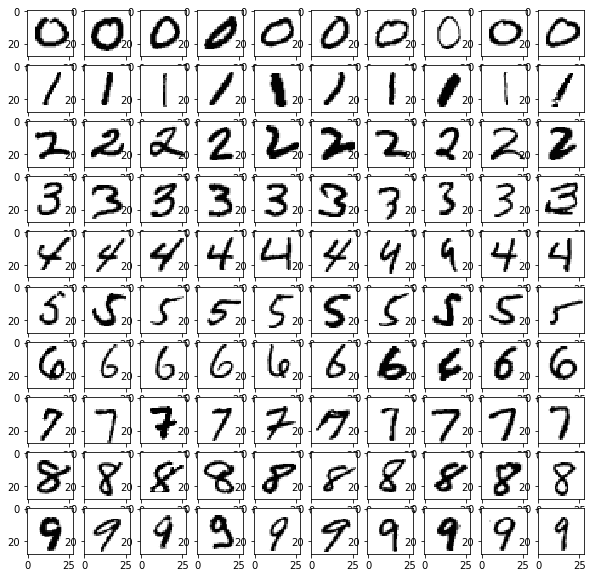

In [3]:
def P1(num_examples=10):
    # select 10 graphs for each digit
    zeroes = np.argwhere(mini_train_labels==0.)[0:10]
    ones = np.argwhere(mini_train_labels==1.)[0:10]
    twos = np.argwhere(mini_train_labels==2.)[0:10]
    threes = np.argwhere(mini_train_labels==3.)[0:10]
    fours = np.argwhere(mini_train_labels==4.)[0:10]
    fives = np.argwhere(mini_train_labels==5.)[0:10]
    sixes = np.argwhere(mini_train_labels==6.)[0:10]
    sevens = np.argwhere(mini_train_labels==7.)[0:10]
    eights = np.argwhere(mini_train_labels==8.)[0:10]
    nines = np.argwhere(mini_train_labels==9.)[0:10]
    examples = np.concatenate((zeroes, ones, twos, threes, fours, fives, sixes, sevens, eights, nines))
    fig = plt.figure(figsize=(10,10))
    for i in range(1,101):
        plt.subplot(10,10,i)
        plt.imshow(mini_train_data[examples[i-1]].reshape((28,28)), cmap=plt.cm.binary)

P1(10)
plt.show()

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k,p=2)
        model.fit(mini_train_data, mini_train_labels)
        test_predicted_labels = model.predict(dev_data)
        print(f"Report for K = {k}")
        print(classification_report(dev_labels, test_predicted_labels))
        
k_values = [1, 3, 5, 7, 9]
P2(k_values)

Report for K = 1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

Report for K = 3
             precision    recall  f1-score   support

        0.0       0.90      1.00      0.95        99
        1.0       0.81      1.00      0.89       105
        2.0       0.95      0.81      0.88       102
        3.0       0.69      0.84      0.75        86
        4.0       0.88      0.85      0.86       104
        

<strong>ANSWER: Based on F1 Score (combins precision and recall), 9 is the most difficult digit. While 2 with a recall of only 0.79 meaning it only found 79% of the actual samples (true positive and false negative) and the digit 3 has the worst precision, meaning accuracy of the positive prediction.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):
    for size in train_sizes:
        print('TrainSize = {}'.format(size),end = "; ")
        model = KNeighborsClassifier(n_neighbors=1,p=2)
        start = time.time()
        model.fit(train_data[:size], train_labels[:size])
        print('TrainTime: {}'.format(round(time.time()-start,3)),end = "; ")
        start = time.time()
        test_predicted_labels = model.predict(dev_data)
        print('PredictTime: {}'.format(round(time.time()-start,3)),end = "; ")
        wrong_prediction = (test_predicted_labels != dev_labels)
        accuracies.append(1-sum(wrong_prediction)/float(len(dev_labels)))
        print('Accuracy: {}'.format(round(1-sum(wrong_prediction)/float(len(dev_labels)),3)))

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)


TrainSize = 100; TrainTime: 0.001; PredictTime: 0.106; Accuracy: 0.72
TrainSize = 200; TrainTime: 0.002; PredictTime: 0.204; Accuracy: 0.786
TrainSize = 400; TrainTime: 0.003; PredictTime: 0.424; Accuracy: 0.841
TrainSize = 800; TrainTime: 0.016; PredictTime: 0.858; Accuracy: 0.884
TrainSize = 1600; TrainTime: 0.043; PredictTime: 1.757; Accuracy: 0.902
TrainSize = 3200; TrainTime: 0.147; PredictTime: 3.466; Accuracy: 0.926
TrainSize = 6400; TrainTime: 0.451; PredictTime: 6.985; Accuracy: 0.937
TrainSize = 12800; TrainTime: 1.553; PredictTime: 13.897; Accuracy: 0.959
TrainSize = 25000; TrainTime: 5.451; PredictTime: 27.558; Accuracy: 0.97


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Linear Assumption


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


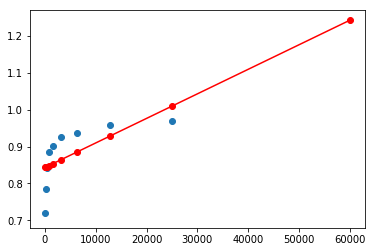

[[0.8438225 ]
 [0.84448903]
 [0.84582209]
 [0.84848819]
 [0.85382041]
 [0.86448485]
 [0.88581371]
 [0.92847145]
 [1.00978776]
 [1.24307226]]


In [6]:
print('Linear Assumption')
plt.scatter(train_sizes,accuracies)
lr = LinearRegression(fit_intercept=True)
X = np.transpose([train_sizes])
Y = np.transpose([accuracies])
lr.fit(X,Y)
X_predict = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000, 60000]
X_predict = np.transpose([X_predict])
plt.plot(X_predict,lr.predict(X_predict),'r-o')
plt.show()
print(lr.predict(X_predict))

Non-Linear Assumption


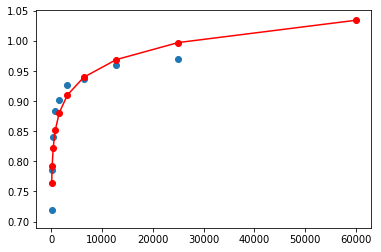

In [7]:
print('Non-Linear Assumption')
plt.scatter(train_sizes,accuracies)
lr = LinearRegression(fit_intercept=True)
X = np.transpose([train_sizes])
Y = np.transpose([accuracies])
X_transformed = np.log(X)
lr.fit(X_transformed,Y)
X_predict = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000, 60000]
X_predict = np.transpose([X_predict])
plt.plot(X_predict,lr.predict(np.log(X_predict)),'r-o')
plt.show()

<strong>ANSWER: The Linear Regression model predicts an accuracy of 124% (exceed 100%) for n=60000. Graph shows a poor fit for really big training sizes. After applying the log transformation, the accurancy for using 60000 training data is 1.03 since it is slightly above 1 so the prediciton is close to 100%

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


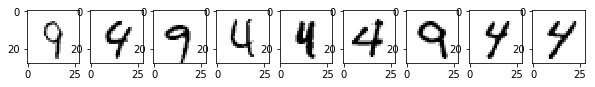

In [8]:
def P5():
    model = KNeighborsClassifier(n_neighbors=1,p=2)
    model.fit(mini_train_data, mini_train_labels)
    test_predicted_labels = model.predict(dev_data)
    print(confusion_matrix(dev_labels, test_predicted_labels))
    mislabel = []
    for i in range(1000):
        if (dev_labels[i] == 4. and test_predicted_labels[i] ==9.) or (dev_labels[i] == 9. and test_predicted_labels[i] ==4.):
            mislabel.append(dev_data[i])
    fig = plt.figure(figsize=(10,10))
    for i in range(9):
        plt.subplot(1,9,i+1)
        plt.imshow(mislabel[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.show()

P5()

<strong>ANSWER: based on mini_train and dev dataset, "9" and "4" are the most confused pair.

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Comparison of 2 filters against raw image


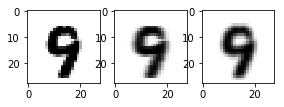

Unblurred: 0.888
mini_train_data blurred, dev_data unblurred: 0.906
mini_train_data, but dev_data blurred: 0.875
mini_train_data blurred and dev_data blurred: 0.9


In [9]:
from scipy.ndimage import filters

def P6():

    def gblur_pixels(array):
        blurred = []
        for pixel in range(784):
            if pixel <= 27 or pixel >=755 or (pixel+1)%28==1:  # skip the edge pixels
                blurred.append(array[pixel])
            else:
                # apply 3 by 3 Gaussian weighting
                blurred.append(1.0/16.0*(array[pixel-29] + array[pixel-28]*2.0 + array[pixel-27] +
                                        array[pixel-1]*2.0 + array[pixel]*4.0 + array[pixel+1]*2.0 +
                                        array[pixel+27] + array[pixel+28]*2.0 + array[pixel+29]))
        return blurred
    mini_copy = mini_train_data.copy()

    print('Comparison of 2 filters against raw image')
    plt.subplot(1,4,1)
    plt.imshow(mini_copy[1].reshape(28,28), cmap=plt.cm.binary)
    plt.subplot(1,4,2)
    plt.imshow(filters.gaussian_filter(mini_copy[1],1).reshape(28,28), cmap=plt.cm.binary)
    plt.subplot(1,4,3)
    plt.imshow(np.array(gblur_pixels(mini_copy[1])).reshape(28,28), cmap=plt.cm.binary)
    plt.show()

    mini_copy = mini_train_data.copy()
    mini_train_blurred = []
    for item in mini_copy:
        mini_train_blurred.append(gblur_pixels(item))
    mini_train_blurred = np.array(mini_train_blurred)

    dev_copy = dev_data.copy()
    dev_data_blurred = []
    for item in dev_copy:
        dev_data_blurred.append(gblur_pixels(item))
    dev_data_blurred = np.array(dev_data_blurred)

    # fit models to blurred and unblurred versions of data 
    nn_model = KNeighborsClassifier(n_neighbors=1)
    nn_model.fit(mini_train_data, mini_train_labels)
    print('Unblurred:', nn_model.score(dev_data, dev_labels))

    nn_model2 = KNeighborsClassifier(n_neighbors=1)
    nn_model2.fit(mini_train_blurred, mini_train_labels)
    print('mini_train_data blurred, dev_data unblurred:', nn_model2.score(dev_data, dev_labels))

    nn_model3 = KNeighborsClassifier(n_neighbors=1)
    nn_model3.fit(mini_train_data, mini_train_labels)
    print('mini_train_data, but dev_data blurred:', nn_model3.score(dev_data_blurred, dev_labels))

    nn_model4 = KNeighborsClassifier(n_neighbors=1)
    nn_model4.fit(mini_train_blurred, mini_train_labels)
    print('mini_train_data blurred and dev_data blurred:', nn_model4.score(dev_data_blurred, dev_labels))


P6()


<strong>ANSWER: 3 by 3 Gaussian filter does improve the prediction accuracy from 0.888 to 0.906 by using blurred training data and raw dev data

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [10]:
def P7():

### STUDENT START ###
    bnb_model = BernoulliNB(alpha=1.0, binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)
    print('BernoulliNB with binarize=0.333 had accuracy of: {}'.format(bnb_model.score(dev_data, dev_labels)))
    
    # preprocess data to convert to 0=white, 1=grey, 2=black
    mini_copy = mini_train_data.copy()
    mini_copy[mini_copy < 0.33] = 0
    mini_copy[np.logical_and(mini_copy >= 0.33, mini_copy <= 0.66)] = 1
    mini_copy[mini_copy > 0.66] = 2
    # now train multinomial classified on mini_copy
    mnb_model = MultinomialNB(alpha=1.0)
    mnb_model.fit(mini_copy, mini_train_labels)
    print('MultinomialNB with white<0.33, grey between 0.33 and 0.66, black > 0.66')
    print('had accuracy of: {}'.format(mnb_model.score(dev_data, dev_labels)))
### STUDENT END ###

P7()

BernoulliNB with binarize=0.333 had accuracy of: 0.815
MultinomialNB with white<0.33, grey between 0.33 and 0.66, black > 0.66
had accuracy of: 0.796


<strong>ANSWER: I find the multiclass model actually had worse results. I expect the binary class model did better because it increased the probablity of where there should have been data in that pixel. With the multiclass model, the 'grey' values are less likely to be interpreted as 'on'.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [11]:
def P8(alphas):

### STUDENT START ###
    bnb_model = BernoulliNB(binarize=0.5)
    grid = GridSearchCV(estimator=bnb_model, param_grid=alphas)
    grid.fit(mini_train_data, mini_train_labels)
    print(grid.grid_scores_)
    return grid


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


[mean: 0.80300, std: 0.01644, params: {'alpha': 0.0}, mean: 0.81800, std: 0.02216, params: {'alpha': 0.0001}, mean: 0.82000, std: 0.02073, params: {'alpha': 0.001}, mean: 0.82100, std: 0.01811, params: {'alpha': 0.01}, mean: 0.81500, std: 0.02013, params: {'alpha': 0.1}, mean: 0.80000, std: 0.01188, params: {'alpha': 0.5}, mean: 0.79500, std: 0.01145, params: {'alpha': 1.0}, mean: 0.78400, std: 0.01934, params: {'alpha': 2.0}, mean: 0.72000, std: 0.02495, params: {'alpha': 10.0}]


In [12]:
print(nb.best_params_)

{'alpha': 0.01}


<strong>ANSWER:The best score with alpha=0.01. I expected accuracy with alpha ==0 to be lower because alpha=0 would not generalize well because it is saying that if the training set had no examples with pixels that matched the test value, then the probability would be 0%. The other values of alpha allow for some flexibility in prior probability to predict on unseen data.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

GaussianNB accuracy, default params: 0.621
Diagnosis...


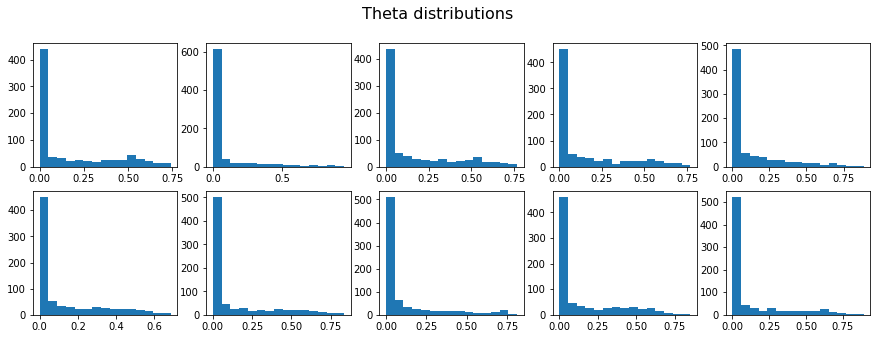

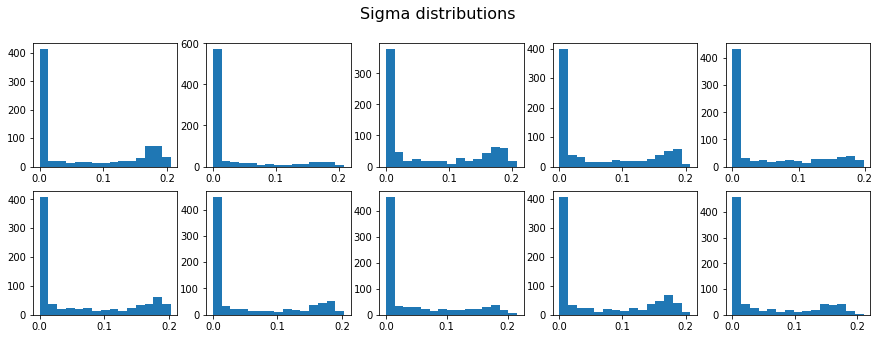

GaussianNB accuracy for sigma_=np.mean(sigma_): 0.774


In [13]:
def P9():

### STUDENT END ###
    gnb_model_1 = GaussianNB()
    gnb_model_1.fit(mini_train_data, mini_train_labels)
    print('GaussianNB accuracy, default params:', gnb_model_1.score(dev_data, dev_labels))
    
    print('Diagnosis...')
    fig1 = plt.figure(figsize=(15,5))
    fig1.suptitle('Theta distributions', fontsize=16)
    for i in range(1,11):
        plt.subplot(2,5,i)
        plt.hist(gnb_model_1.theta_[i-1], bins=15)
        
    fig2 = plt.figure(figsize=(15,5))
    fig2.suptitle('Sigma distributions', fontsize=16)
    for i in range(1,11):
        plt.subplot(2,5,i)
        plt.hist(gnb_model_1.sigma_[i-1], bins=15)
    plt.show()
    
    # test with bumping variance up by avg sigma
    gnb_model_2 = GaussianNB()
    gnb_model_2.fit(mini_train_data, mini_train_labels)
    gnb_model_2.sigma_ += np.mean(gnb_model_2.sigma_)
    print('GaussianNB accuracy for sigma_=np.mean(sigma_):', gnb_model_2.score(dev_data, dev_labels))
    
    
### STUDENT END ###

gnb = P9()

<strong>ANSWER: By adding some additional variance (avg sigma in my example) to the GaussianNB model, the accuracy increases to about the same level as the other NB models. When the variance of each pixel is close to 0, the GaussianNB model was likely to predict 0. By moving the variance of each pixel a little bit away from zero, the model improved accuracy by allowing some flexibility in predicting unseen data.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

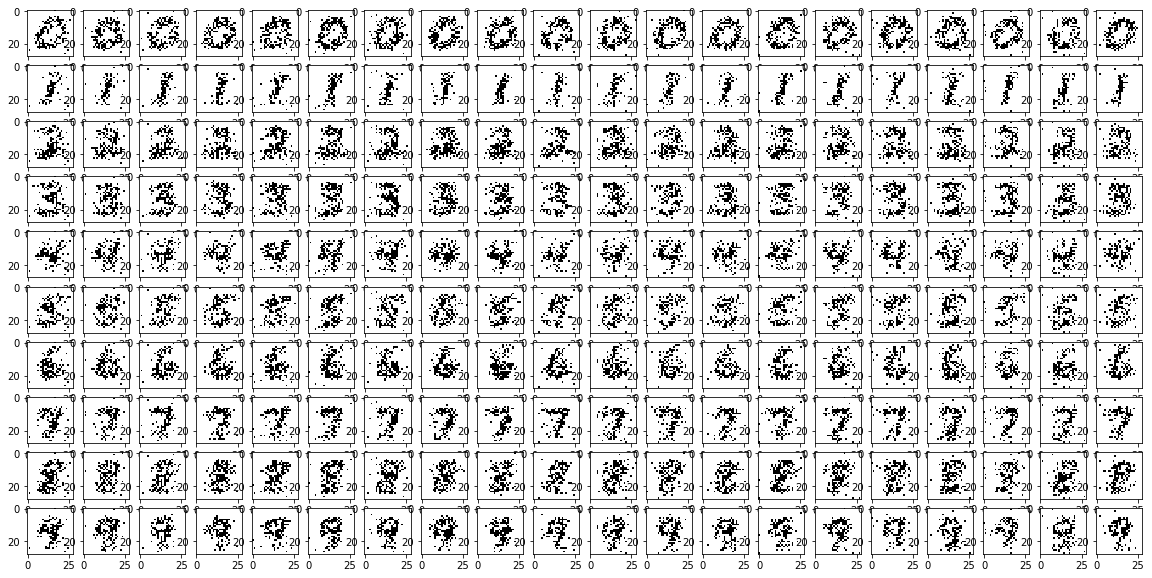

In [14]:
def P10(num_examples):

### STUDENT START ###
    bnb_model = BernoulliNB(binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)
    probs = np.exp(bnb_model.feature_log_prob_)
    
    # generate 20 random 'digits', which are 784 features
    rand_digits = np.random.rand(20,784)
    
    # create 20 examples of each digit
    digits = []
    for i in range(10):
        thisDigit = np.copy(rand_digits)
        thisDigit[thisDigit <= probs[i]] = 1
        thisDigit[thisDigit != 1] = 0
        digits.append(thisDigit)
        
    digits = np.concatenate((digits[0], digits[1], digits[2], digits[3], digits[4], digits[5], digits[6], digits[7], digits[8],digits[9]))
    fig = plt.figure(figsize=(20,10))
    for i in range(1,201):
        plt.subplot(10,20,i)
        plt.imshow(digits[i-1].reshape((28,28)), cmap=plt.cm.binary)

### STUDENT END ###

P10(20)

<strong>ANSWER: The generated digits are blurrier than the training digits because of the randomization, but still generally recognizable.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [15]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    bnb_model = BernoulliNB(alpha=0.01, binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)
    
    # find the max post probability for each digit prediction
    max_post_probs = np.amax(bnb_model.predict_proba(dev_data), axis=1)
    # assign each of those max probabilities to a bin in buckets 0~8
    bucket_digitize = np.digitize(max_post_probs, buckets, right=True)
    # fill Total with Bin Count 
    for i in bucket_digitize:
            total[i] += 1
    
    # find what digit the max post probability corresponds to
    max_post_probs_digit = np.argmax(bnb_model.predict_proba(dev_data), axis=1)
    # did the max post probability match the dev label?
    correct_predictions = max_post_probs_digit == dev_labels
    # create an array of just the max post probabilities that were correct
    correct_max_probs = correct_predictions * max_post_probs
    # assign those correct post probabilities to a bin in buckets
    correct_digitize = np.digitize(correct_max_probs, buckets, right = True)
    for i in correct_digitize:
        correct[i] += 1

### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  30    accuracy = 0.200
p(pred) <= 0.9990000000000    total =  86    accuracy = 0.465
p(pred) <= 0.9999900000000    total =  85    accuracy = 0.612
p(pred) <= 0.9999999000000    total =  58    accuracy = 0.690
p(pred) <= 0.9999999990000    total =  61    accuracy = 0.754
p(pred) <= 0.9999999999900    total =  73    accuracy = 0.877
p(pred) <= 0.9999999999999    total =  75    accuracy = 0.840
p(pred) <= 1.0000000000000    total = 532    accuracy = 0.953


<strong>ANSWER: The Naive Bayes classifier is weakly calibrated. Specifically, the NB classifier is biased towards really high posterior probabilities. For example, the posterior probability of 0.9 should be 90% accurate but was only 20% accurate in the NB model. However, the higher the posterior probability, the higher the accuarcy of the NB classifier, so their is a positive correlation between posterior probability and accuracy.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [16]:
def P12():

### STUDENT START ###
    bnb_model = BernoulliNB(alpha=0.01, binarize=0.5)
    bnb_model.fit(mini_train_data, mini_train_labels)
    print('Standard Model Accuracy: {}'.format(bnb_model.score(dev_data, dev_labels)))

    mini_train_copy = mini_train_data.copy()
    
    # add 56 extra features to represent mean of pixel for each row and col of the 28*28 image
    def myreformat(train_raw):
        new = []
        for item in train_raw:
            new.append(np.concatenate((item,item.reshape(28,28).mean(0),item.reshape(28,28).mean(1)),0))
        return np.array(new)

    haha = myreformat(mini_train_copy)

    bnb_model_2 = BernoulliNB(alpha=0.5)
    bnb_model_2.fit(haha, mini_train_labels)
    print('New Model Accuracy: {}'.format(bnb_model_2.score(myreformat(dev_data), dev_labels)))
### STUDENT END ###

P12()

Standard Model Accuracy: 0.818
New Model Accuracy: 0.823
